# Random Forest

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1448
           1       0.89      0.97      0.93        79

    accuracy                           0.99      1527
   macro avg       0.94      0.98      0.96      1527
weighted avg       0.99      0.99      0.99      1527



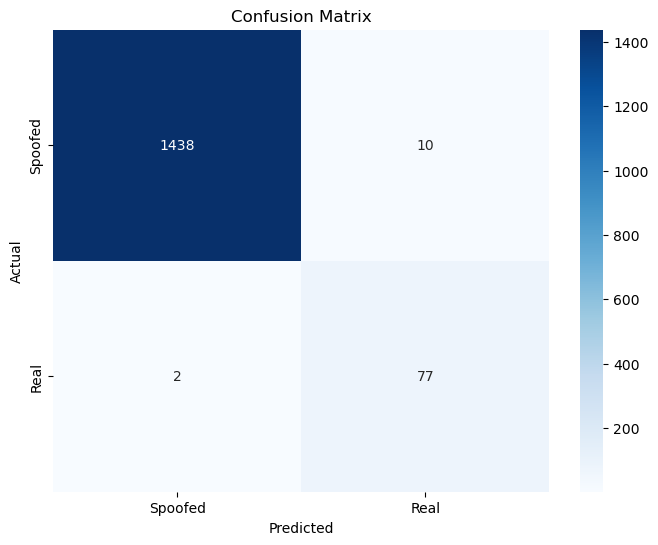

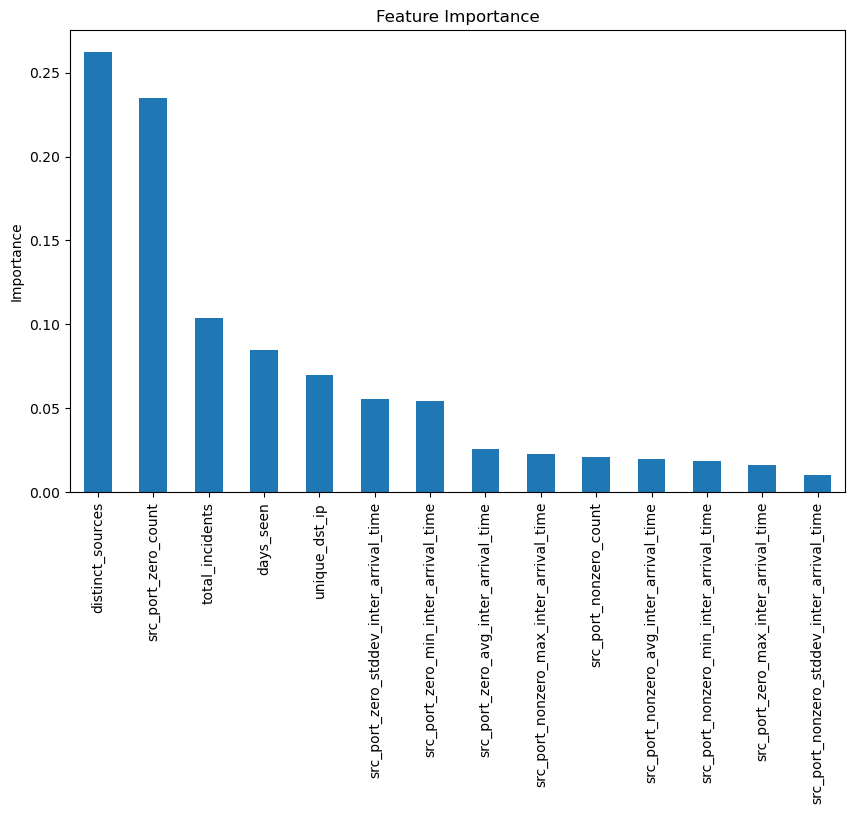

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_file = r'C:\Users\wpman\Desktop\RF\TCP22-TrainingDataSet_train.csv'
test_file = r'C:\Users\wpman\Desktop\RF\TCP22-TrainingDataSet_test.csv'

# Load datasets
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Separate features and target
X_train = train_data.drop(columns=['src_ip', 'Label'])  # Drop 'src_ip' and 'Label'
y_train = train_data['Label'].map({'Spoofed': 0, 'Real': 1})  # Encode labels

X_test = test_data.drop(columns=['src_ip', 'Label'])  # Drop 'src_ip' and 'Label'
y_test = test_data['Label'].map({'Spoofed': 0, 'Real': 1})  # Encode labels

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators= 50, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spoofed', 'Real'], yticklabels=['Spoofed', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=train_data.columns[2:]).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()


# Logistic Reggression

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1448
           1       0.81      1.00      0.90        79

    accuracy                           0.99      1527
   macro avg       0.91      0.99      0.95      1527
weighted avg       0.99      0.99      0.99      1527



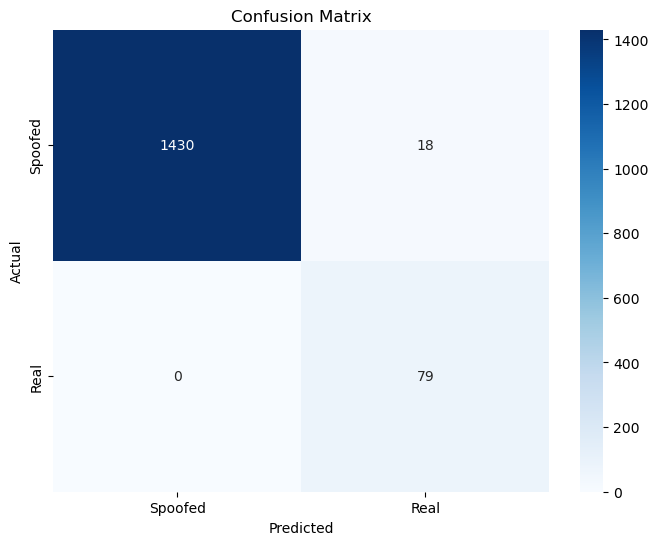

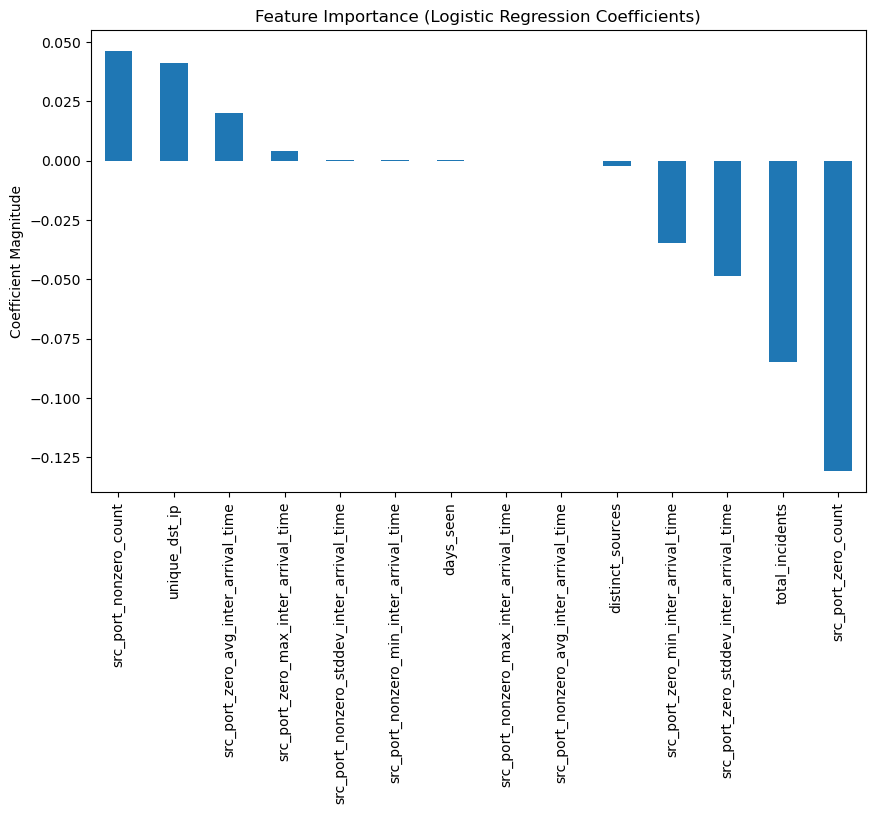

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_file = r'C:\Users\wpman\Desktop\RF\TCP22-TrainingDataSet_train.csv'
test_file = r'C:\Users\wpman\Desktop\RF\TCP22-TrainingDataSet_test.csv'

# Load datasets
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Separate features and target
X_train = train_data.drop(columns=['src_ip', 'Label'])  # Drop 'src_ip' and 'Label'
y_train = train_data['Label'].map({'Spoofed': 0, 'Real': 1})  # Encode labels

X_test = test_data.drop(columns=['src_ip', 'Label'])  # Drop 'src_ip' and 'Label'
y_test = test_data['Label'].map({'Spoofed': 0, 'Real': 1})  # Encode labels

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spoofed', 'Real'], yticklabels=['Spoofed', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (Coefficient Magnitudes)
coefficients = pd.Series(logreg_model.coef_[0], index=train_data.columns[2:])
plt.figure(figsize=(10, 6))
coefficients.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.ylabel('Coefficient Magnitude')
plt.show()
